In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def phi(hs,hlr,g):
        if hs>hlr:
            return sqrt(0.5*g*(hs+hlr)/(hs*hlr))*(hs-hlr)
        else:
            return 2*sqrt(g)*(sqrt(hs) - sqrt(hlr))
        
def func(hs,hl,hr,ul,ur,g):
        return (phi(hs,hl,g) + phi(hs,hr,g) + ur - ul)
    
def dfunc(hs,hl,hr,ul,ur,g):
        eps = 1e-7
        return (func(hs+eps,hl,hr,ul,ur,g) - func(hs-eps,hl,hr,ul,ur,g))/(2*eps)    

In [3]:
def newton(hl,hr,ul,ur,g):
    hs = ((sqrt(hl) + sqrt(hr) - (ur-ul)/2/sqrt(g))**2)/4
    tol = 1e-12
    max_iter = 100
    for i in range(max_iter):
        gk = func(hs,hl,hr,ul,ur,g)
        res = abs(gk)
        
        if (res<tol):
            break
        else:
            continue
            
        dg = dfunc(hs,hl,hr,ul,ur,g)
        dh = -gk/dg
        delta = 1
        
        for i in range(20):
            if (abs(func(hs+dh*delta,hl,hr,ul,ur,g)) >= res):
                delta = 0.5*delta
            else:
                break
        hs = hs + delta*dh
    return hs

In [4]:
def exact(ql,qr,xi,mq,g):
    
    hl = ql[0]
    hr = qr[0]
    ul = ql[1]/ql[0]
    ur = qr[1]/qr[0]
    
    hs = newton(hl,hr,ul,ur,g)
    us = ul - phi(hs,hl,g)
    
    if xi<=us:
        
        if hs>hl:
            s = ul - sqrt(0.5*g*hs/hl*(hl+hs))
            if xi<=s:
                h = hl
                hu = hl*ul
            else:
                h = hs
                hu = hs*us
        else:
            head = ul - sqrt(g*hl)
            tail = us - sqrt(g*hs)
            if xi <= head:
                h = hl
                hu = hl*ul
            elif xi>=tail:
                h = hs
                hu = hs*us
            else:
                h = (((ul + 2*sqrt(g*hl) - xi)/3)**2)/g
                u = xi + sqrt(g*h)
                hu = h*u
    else:
        
        if hs>hr:
            s = ur + sqrt(0.5*g*hs/hr*(hs+hr))
            if xi<=s:
                h = hs
                hu = hs*us
            else:
                h = hr
                hu = hr*ur
        else:
            head = ur + sqrt(g*hr)
            tail = us + sqrt(g*hs)
            if (xi>=head):
                h = hr
                hu = hr*ur
            elif xi<=tail:
                h = hs
                hu = hs*us
            else:
                h = (((xi-ur+2*sqrt(g*hr))/3)**2)/g
                u = xi - sqrt(g*h)
                hu = h*u
    if mq == 0:
        return h
    else:
        return hu
    
                

In [5]:
def speed(ql,qr,g):
    hl = ql[0]
    hr = qr[0]
    ul = ql[1]/ql[0]
    ur = qr[1]/qr[0]
    hs = newton(hl,hr,ul,ur,g)
    s = ul - sqrt(0.5*g*hs/hl*(hl+hs))
    return s


In [6]:
'''N = 100

g = 1
hl = 1
hr = 1
ul = -0.5
ur = 0.5

hs = newton(hl,hr,ul,ur,g)'''

'N = 100\n\ng = 1\nhl = 1\nhr = 1\nul = -0.5\nur = 0.5\n\nhs = newton(hl,hr,ul,ur,g)'

In [7]:

'''# mq = 0 : Height field
# mq = 1 : Momentum field

mq = 2

ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

t = 0.2
a = -0.5
b = 0.5

x = linspace(a,b,N)

q = zeros(N)
for i in range(N):
    
    xi = x[i]/t

    q[i] = (exact(ql,qr,xi,mq,g))'''

'# mq = 0 : Height field\n# mq = 1 : Momentum field\n\nmq = 2\n\nql = array([hl,hl*ul])\nqr = array([hr,hr*ur])\n\nt = 0.2\na = -0.5\nb = 0.5\n\nx = linspace(a,b,N)\n\nq = zeros(N)\nfor i in range(N):\n    \n    xi = x[i]/t\n\n    q[i] = (exact(ql,qr,xi,mq,g))'

In [8]:
#flux
def f(q):
    q1 = q[0]
    q2 = q[1]
    flux = zeros(2)
    flux[0] = q2
    flux[1] = (((q2)**2)/q1) + (0.5*g*(q1)**2)
    return flux

In [9]:
#problem
hl = 2
hr = 1
ul = 0
ur = 0


# Spatial domain
ax = -5
bx = 5
ay = -2
by = 4
meqn = 2  # Number of equations in the system

# Gravity
g = 1

# Temporal domain
to = 0
Tfinal = 2

#Initial uo and ho for the newton method
ho = 0.1
uo = 0.01

# Numerical parameters
epislon = 1e-16
max_iter = 100

#Numerical values
qo = array([ho,uo])

#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

N = 200
nsteps = 30
dx = (bx - ax)/N

cfl = 0.4

a = 2
dt_est = cfl*dx/a

#M = int(Tfinal/dt_est)+1

#dt = Tfinal/M

#t = linspace(to,Tfinal,M+1)

#x = linspace(ax+(dx/2),bx-(dx/2),N)

#xe = linspace(ax,bx,N+1) #edge locations
#x = xe[:-1] + dx/2       #Cell-center locations

#xc = linspace(ax,bx,N)
#dt = (Tfinal - to)/(nsteps-1)

#dtdx = dt/dx



In [10]:
tend = 0.5
x = linspace(ax+(dx/2),bx-(dx/2),N)
t = linspace(to,Tfinal,N)
cfl = 0.6

In [11]:
#Initial conditions
qold1 = zeros(N)
qold2 = zeros(N)
qnew1 = zeros(N)
qnew2 = zeros(N)

qold1 = where(x <= 0 , ql[0], qr[0])
qold2 = where(x <= 0 , ql[1], qr[1]) 

<IPython.core.display.Javascript object>


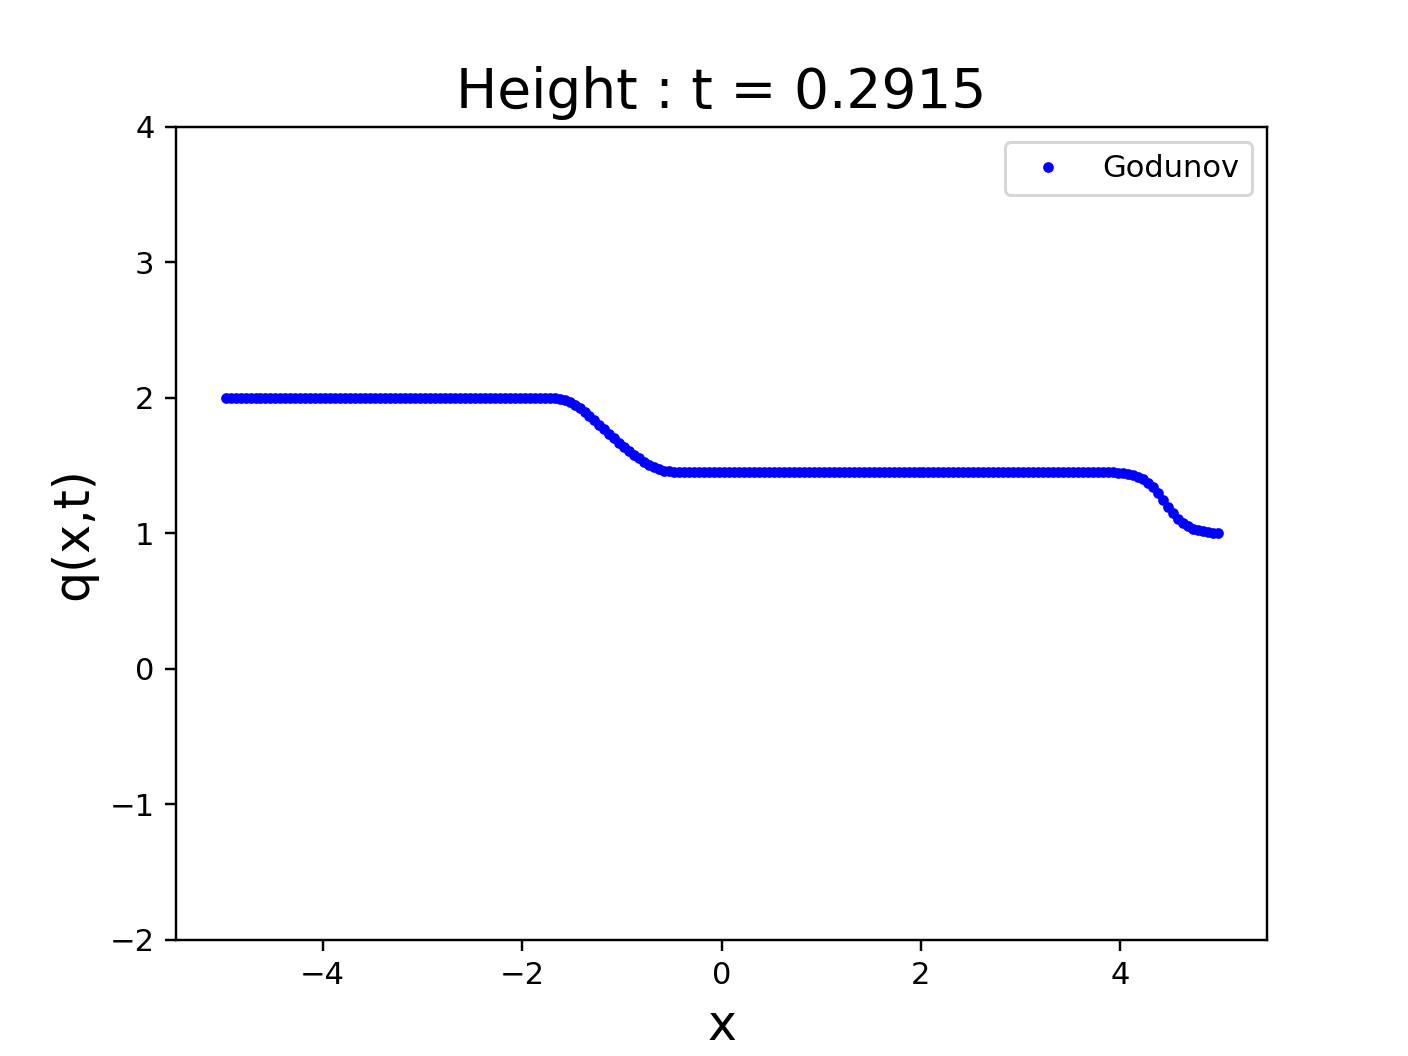

In [13]:
fig = figure(1)

clf()
# mq = 0 : Height field
# mq = 1 : Momentum field

mq = 0

if mq == 0:
    tstr = 'Height : t = {:.4f}'

    hdl, = plot(x,qnew1,'b.',markersize=5,label='Godunov')

else:
    tstr = 'Momentum : t = {:.4f}'
    hdl, = plot(x,qnew2,'b.',markersize=5,label='Godunov')
    
htitle = title(tstr.format(0),fontsize=18)

#q0 = qexact(x,to,mq,qo,ql,qr,qmr,qms,lam1,g,max_iter,epislon)

#hde, = plot(x,q0,'r-',markersize=5,label='exact_soln')


#Time loop
time = 0
for n in range(nsteps):
    
    #q = qexact(x,t[n],mq,qo,ql,qr,qmr,qms,lam1,g,max_iter,epislon)
    
    #hde.set_ydata(q)
    
    #compute time step
    a = 0
    for i in range(N):
        a = max(a,abs(speed(ql,qr,g)))
        
    dt = cfl*dx/a
    
    if (time + dt)>tend:
        dt = tend - time
    elif time >= tend:
        break
            
    for i in range(N):
        if i == N-1:
            q1l = array([qold1[i],qold2[i]])
            q1r = array([qold1[i],qold2[i]])
        else:
            q1l = array([qold1[i],qold2[i]])
            q1r = array([qold1[i+1],qold2[i+1]])
        
        hms = exact(q1l,q1r,0,0,g)
        hums = exact(q1l,q1r,0,1,g)
        q1e = array([hms,hums])
        
        f1 = f(q1e) #f_{i+1/2}
        
        if i == 0:
            q2l = array([qold1[i],qold2[i]])
            q2r = array([qold1[i],qold2[i]])
        else:
            q2l = array([qold1[i-1],qold2[i-1]])
            q2r = array([qold1[i],qold2[i]])
        
        hms = exact(q2l,q2r,0,0,g)
        hums = exact(q2l,q2r,0,1,g)
        q2e = array([hms,hums])
        f2 = f(q2e) #f_{i-1/2}

        #soln at N+1

        qnew1[i] = qold1[i] - (dt/dx)*(f1[0]-f2[0])

        qnew2[i] = qold2[i] - (dt/dx)*(f1[1]-f2[1])

    
    if mq == 0:
        hdl.set_ydata(qnew1)
    else:
        hdl.set_ydata(qnew2)
        
    #overwrite the soln
    qold1 = qnew1
    qold2 = qnew2
    
    #update time step
    time = time + dt
    
    xlabel('x',fontsize=16)
    ylabel('q(x,t)',fontsize=16)
    htitle.set_text(tstr.format(t[n]))
    
    ylim([ay,by])
    legend()
    pause(0.1)

    fig.canvas.draw()        

    